In [39]:
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv("insurance_pre.csv")
dataset

dataset=pd.get_dummies(dataset,drop_first=True)
dataset

dataset.columns

independent=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]
independent

dependent=dataset[['charges']]
dependent 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent, dependent, test_size=0.30,random_state=0)

In [40]:
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'verbose': -1
}

In [41]:
from lightgbm import LGBMRegressor
regressor=LGBMRegressor(**params)
regressor=regressor.fit(x_train,y_train)

[LightGBM] [Warning] Unknown parameter: learnnig_rage
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


In [42]:
y_pred=regressor.predict(x_test)

from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

r_score
print("the best value is ", r_score)

the best value is  0.885373041916979


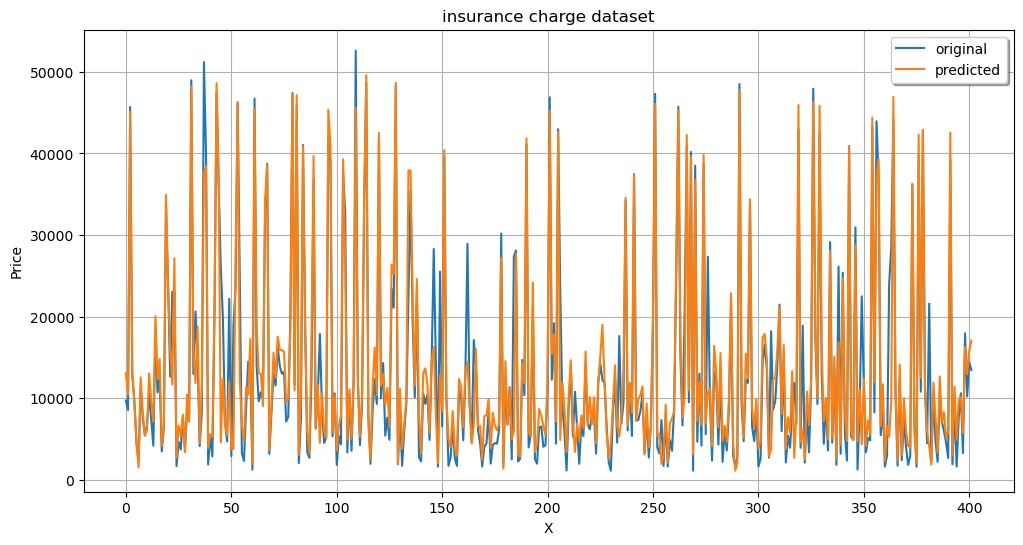

In [44]:
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("insurance charge dataset")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 